In [2]:
from sklearn.datasets import load_iris
dataset = load_iris()
data = dataset.data
target = dataset.target

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(data , target , test_size = 0.3)
corr_matrix = np.corrcoef(x_train , y_train , rowvar = False)
seaborn.heatmap(corr_matrix , annot = True, cmap = 'hot' , cbar = True)
plt.axis('off')
plt.show()

ModuleNotFoundError: No module named 'seaborn'

# Outcomes of the corr matrix
The columns in the correlation matrix are sepal length , sepal width , petal length , petal width , target_values

On observing the last row we can see that how the features are correlated to the output (High degree of correlation with petal length and petal width)

We can also observe that there is a high degree of correlation between petal length and petal width

In [ ]:
dataset.feature_names , dataset.target_names

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

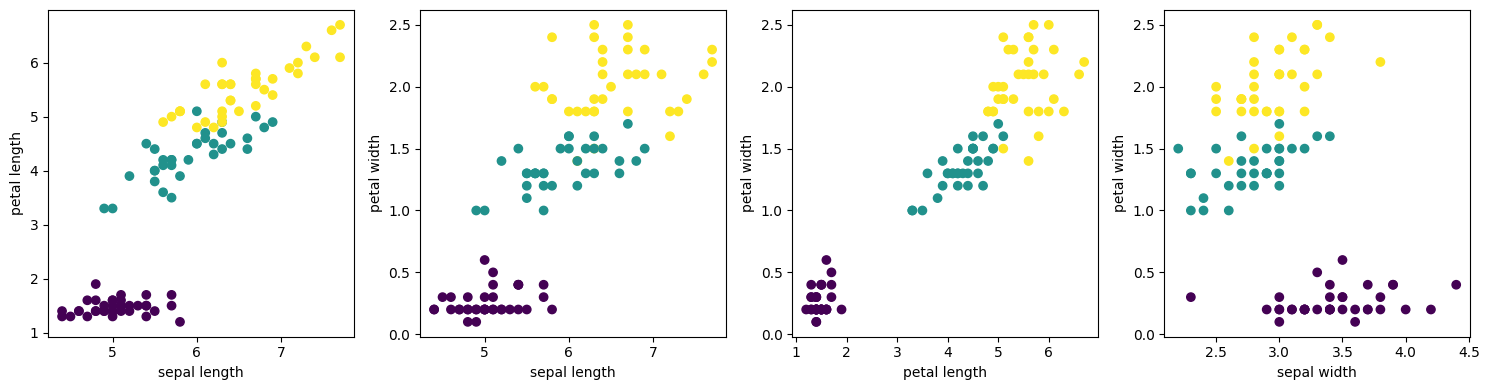

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 4, figsize=(15, 4))

axs[0].scatter(x_train[:, 0], x_train[:, 2], c=y_train.astype(np.int64))
axs[0].set_xlabel('sepal length')
axs[0].set_ylabel('petal length')

axs[1].scatter(x_train[:, 0], x_train[:, 3], c=y_train.astype(np.int64))
axs[1].set_xlabel('sepal length')
axs[1].set_ylabel('petal width')

axs[2].scatter(x_train[:, 2], x_train[:, 3], c=y_train.astype(np.int64))
axs[2].set_xlabel('petal length')
axs[2].set_ylabel('petal width')

axs[3].scatter(x_train[:, 1], x_train[:, 3], c=y_train.astype(np.int64))
axs[3].set_xlabel('sepal width')
axs[3].set_ylabel('petal width')

plt.tight_layout()
plt.show()

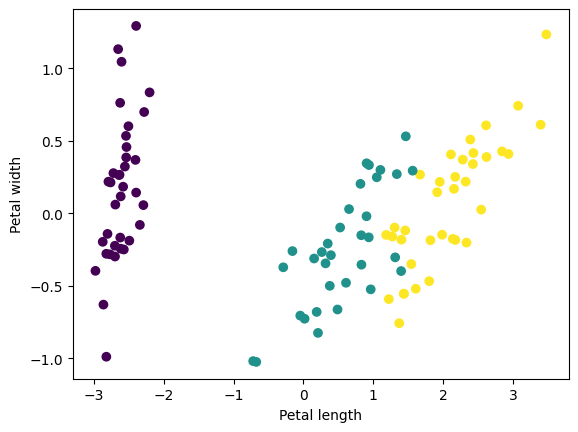

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END ............C=0.001, kernel=linear;, score=0.333 total time=   0.0s
[CV 2/5] END ............C=0.001, kernel=linear;, score=0.333 total time=   0.0s
[CV 3/5] END ............C=0.001, kernel=linear;, score=0.667 total time=   0.0s
[CV 4/5] END ............C=0.001, kernel=linear;, score=0.667 total time=   0.0s
[CV 5/5] END ............C=0.001, kernel=linear;, score=0.667 total time=   0.0s
[CV 1/5] END ..............C=0.001, kernel=poly;, score=0.333 total time=   0.0s
[CV 2/5] END ..............C=0.001, kernel=poly;, score=0.333 total time=   0.0s
[CV 3/5] END ..............C=0.001, kernel=poly;, score=0.524 total time=   0.0s
[CV 4/5] END ..............C=0.001, kernel=poly;, score=0.476 total time=   0.0s
[CV 5/5] END ..............C=0.001, kernel=poly;, score=0.476 total time=   0.0s
[CV 1/5] END ...............C=0.001, kernel=rbf;, score=0.333 total time=   0.0s
[CV 2/5] END ...............C=0.001, kernel=rbf;

GridSearchCV(estimator=SVC(random_state=42),
             param_grid=[{'C': [0.001, 0.1, 1, 10, 100],
                          'kernel': ['linear', 'poly', 'rbf']}],
             verbose=3)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
x_new_train = pca.fit_transform(x_train)

plt.scatter(x_new_train[: , 0] , x_new_train[: , 1] , c = y_train.astype(np.int64))
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

# as the data is linearly seperable we can use Logistic Regression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc_clf = SVC(random_state = 42)
params = [{'kernel' : ['linear' , 'poly' , 'rbf'] , 'C' : [0.001 , 0.1 , 1 , 10 , 100]}]

model = GridSearchCV(svc_clf , params , verbose = 3)
model.fit(x_new_train , y_train)

The training accuracy of best model is: 0.9523809523809523


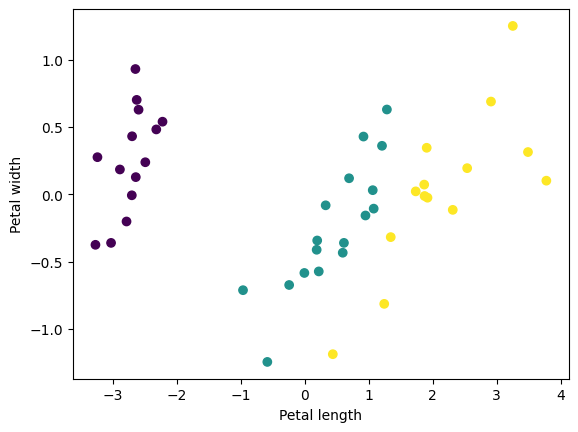

The test accuracy is : 0.9777777777777777


In [ ]:
print(f"The training accuracy of best model is: {model.best_score_}")

best_model = model.best_estimator_

# testing over test data
from sklearn.metrics import accuracy_score
x_new_test = pca.fit_transform(x_test)
predicted = best_model.predict(x_new_test)
score = accuracy_score(predicted , y_test.astype(np.int64))

plt.scatter(x_new_test[: , 0] , x_new_test[: , 1] , c = y_test.astype(np.int64))
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()
print(f'The test accuracy is : {score}')